## Libraries

In [8]:
%load_ext autoreload
%autoreload 2
import sys
#sys.path.insert(1, '/home/ximo/Documents/GitHub/skforecast')
%config Completer.use_jedi = False

SARIMAX (Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) is a generalization of the ARIMA model that allows incorporating seasonality and exogenous variables. This model have a total of 6 hyperparameters that must specified when training the model:

+ p: Trend autoregression order.

+ d: Trend difference order.

+ q: Trend moving average order.

+ P: Seasonal autoregressive order.

+ D: Seasonal difference order.

+ Q: Seasonal moving average order.

+ m: The number of time steps for a single seasonal period.

One way to find the best values is by using grid search. The `grid_search_sarimax` function of the *skforecast.model_selection_statsmodels* module is a wrapper that automates this process using the [SARIMAX] implementation (https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html#statsmodels.tsa.statespace.sarimax.SARIMAX) available in the statsmodels library.

In [9]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.model_selection_statsmodels import grid_search_sarimax

## Data

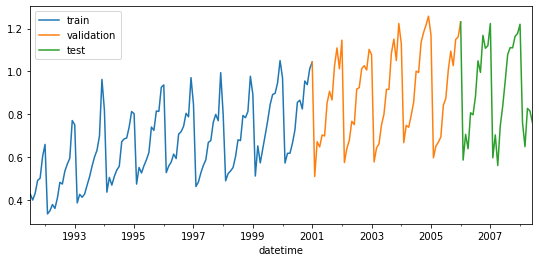

In [10]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o.csv')
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 24
data_train = data.loc[: '2001-01-01']
data_val = data.loc['2001-01-01' : '2006-01-01']
data_test  = data.loc['2006-01-01':]

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_val.plot(ax=ax, label='validation')
data_test.plot(ax=ax, label='test')
ax.legend();

## Grid Search SARIMAX and ARIMA models

In [11]:
param_grid = {'order': [(12, 0, 0), (12, 2, 0), (12, 1, 0), (12, 1, 1), (14, 1, 4)],
             'seasonal_order': [(0, 0, 0, 0)]}

results_grid = grid_search_sarimax(
                y = data.loc[:'2006-01-01'],
                param_grid = param_grid,
                initial_train_size = len(data_train),
                steps = 7,
                metric = 'mean_absolute_error',
                refit = False,
                verbose = False,
                fit_kwargs = {'maxiter': 200, 'disp': 0}
             )

print(results_grid.to_markdown(tablefmt="github", index=False))

root       INFO  Number of models compared: 5
  0%|                                                               | 0/5 [00:00<?, ?it/s]/home/ximo/anaconda3/envs/cienciadedatos/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 20%|███████████                                            | 1/5 [00:02<00:10,  2.74s/it]/home/ximo/anaconda3/envs/cienciadedatos/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 60%|█████████████████████████████████                      | 3/5 [00:09<00:06,  3.13s/it]/home/ximo/anaconda3/envs/cienciadedatos/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-s

| params                                                               |    metric | order      | seasonal_order   | trend   |
|----------------------------------------------------------------------|-----------|------------|------------------|---------|
| {'order': (12, 1, 1), 'seasonal_order': (0, 0, 0, 0), 'trend': None} | 0.0504759 | (12, 1, 1) | (0, 0, 0, 0)     |         |
| {'order': (14, 1, 4), 'seasonal_order': (0, 0, 0, 0), 'trend': None} | 0.0505509 | (14, 1, 4) | (0, 0, 0, 0)     |         |
| {'order': (12, 1, 0), 'seasonal_order': (0, 0, 0, 0), 'trend': None} | 0.0528397 | (12, 1, 0) | (0, 0, 0, 0)     |         |
| {'order': (12, 2, 0), 'seasonal_order': (0, 0, 0, 0), 'trend': None} | 0.054425  | (12, 2, 0) | (0, 0, 0, 0)     |         |
| {'order': (12, 0, 0), 'seasonal_order': (0, 0, 0, 0), 'trend': None} | 0.0636531 | (12, 0, 0) | (0, 0, 0, 0)     |         |
